# Course 2 Assignment 2

For this assignment we needed to conduct a Chi Squared test.

Which will mean converting my data to categorical data.

**This crap was too annoying and confusing for me to submit but I'm keeping it to demonstrate how to do post-hoc comparisons for a chi-square test**

In [2]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

## Loading and preparing data

In [3]:
# show all columns
pd.set_option('display.max_columns', None)
# loading the data from the local file
df = pd.read_csv('data/covid_data.csv')
# prepare data
df.date = pd.to_datetime(df.date)
dfx = df.dropna(subset=['continent'])  # gets rid of summaries for 'world' and 'africa' etc, as I only want data for countries
# so as to compare like with like, I'm keeping only countries with human development indices over 0.9
dfx = dfx[dfx.human_development_index > 0.9]

I want to compare mean stringency index per country, i.e. how strict lockdown conditions have been imposed overall, with total cases per million people. To do this, I will group by location, and use aggregate functions.

In [4]:
dfx = dfx.dropna(subset=['new_cases_per_million', 'stringency_index'])  # get rid of countries with no data in these columns
cols = {'stringency_index':'mean_stringency_index', 'new_cases_per_million':'total_cases_per_million'}
dfy = dfx.groupby('location').agg({'stringency_index':'mean', 'new_cases_per_million':'sum'}).rename(columns=cols)
dfy

,mean_stringency_index,total_cases_per_million
location,,
Australia,58.083509,1163.924
Austria,61.290330,67154.806
Belgium,58.335448,83871.729
Canada,62.882445,31071.270
Denmark,56.735674,42765.082
Finland,43.629226,15450.522
France,60.171329,81662.054
Germany,61.854075,39283.099
Iceland,45.430733,18725.259


In [5]:
# cutting them into bins to make them categorical
# since chi square tests are only interpretable when the response variable has 2 levels, I will do 2 bins
dfy['stringency_rating'] = pd.cut(dfy.mean_stringency_index, 3, labels=['low restrictions', 'medium restrictions', 'high restrictions'])
dfy['total_cases_rating'] = pd.cut(dfy.total_cases_per_million, 2, labels=['low cases', 'high cases'])
dfy

,mean_stringency_index,total_cases_per_million,stringency_rating,total_cases_rating
location,,,,
Australia,58.083509,1163.924,medium restrictions,low cases
Austria,61.290330,67154.806,high restrictions,high cases
Belgium,58.335448,83871.729,medium restrictions,high cases
Canada,62.882445,31071.270,high restrictions,low cases
Denmark,56.735674,42765.082,medium restrictions,low cases
Finland,43.629226,15450.522,low restrictions,low cases
France,60.171329,81662.054,high restrictions,high cases
Germany,61.854075,39283.099,high restrictions,low cases
Iceland,45.430733,18725.259,low restrictions,low cases


In [6]:
# making crosstab
ct = pd.crosstab(dfy.stringency_rating, dfy.total_cases_rating)
ct

total_cases_rating,low cases,high cases
stringency_rating,,
low restrictions,4,0
medium restrictions,5,4
high restrictions,3,8


In [7]:
# column percentages
ct/(ct.sum(axis=0))

total_cases_rating,low cases,high cases
stringency_rating,,
low restrictions,0.333333,0.000000
medium restrictions,0.416667,0.333333
high restrictions,0.250000,0.666667


In [8]:
# chi-square
ch, p, df, ex = stats.chi2_contingency(ct)
print(f'Chi-square value: {ch}')
print(f'p value: {p}')
print(f'Expected counts: \n{ex}')

Chi-square value: 6.383838383838384
p value: 0.04109292999270689
Expected counts: 
[[2.  2. ]
 [4.5 4.5]
 [5.5 5.5]]


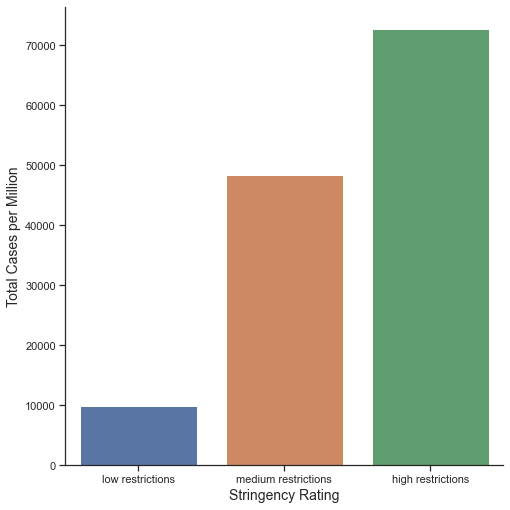

In [9]:
sns.set_theme(style="ticks")
g = sns.catplot(data=dfy, x='stringency_rating', y='total_cases_per_million', kind='bar', ci=None, height=7)
g.set_axis_labels('Stringency Rating', 'Total Cases per Million', fontsize=14)
_ = g

comparisons i need to make:

1) low restrictions and medium restrictions

2) low restrictions and high restrictions

3) medium restrictions and high restrictions

In [10]:
df1 = dfy[(dfy.stringency_rating == 'low restrictions')|(dfy.stringency_rating == 'medium restrictions')] # low and medium
df2 = dfy[(dfy.stringency_rating == 'low restrictions')|(dfy.stringency_rating == 'high restrictions')] # low and high
df3 = dfy[(dfy.stringency_rating == 'medium restrictions')|(dfy.stringency_rating == 'high restrictions')] # medium and high

In [11]:
dfs = [df1, df2, df3]
names = ['low/medium', 'low/high', 'medium/high']
p_val = 0.05/3

for df, name in zip(dfs, names):
    print(f'\nCrosstab for {name}')
    ct = pd.crosstab(df.stringency_rating, df.total_cases_rating)
    print(ct)
    print(f'\nColumn percentages for {name}')
    # column percentages
    cx = ct/(ct.sum(axis=0))
    print(cx)
    print(f'\nChi Square test for {name}')
    ch, p, df, ex = stats.chi2_contingency(ct)
    print(f'Chi-square value: {ch}')
    print(f'p value: {p}')
    print(f'Expected counts: \n{ex}')
    print(f'\nUsing Bonferroni Adjustment, significant p-value is {p_val:.3f}')
    if p < p_val:
        print(f'This means our value for {name} is significant')
    else:
        print(f'This means our value for {name} is not significant')


Crosstab for low/medium
total_cases_rating   low cases  high cases
stringency_rating                         
low restrictions             4           0
medium restrictions          5           4

Column percentages for low/medium
total_cases_rating   low cases  high cases
stringency_rating                         
low restrictions      0.444444         0.0
medium restrictions   0.555556         1.0

Chi Square test for low/medium
Chi-square value: 0.9052854938271606
p value: 0.3413684182482318
Expected counts: 
[[2.76923077 1.23076923]
 [6.23076923 2.76923077]]

Using Bonferroni Adjustment, significant p-value is 0.017
This means our value for low/medium is not significant

Crosstab for low/high
total_cases_rating  low cases  high cases
stringency_rating                        
low restrictions            4           0
high restrictions           3           8

Column percentages for low/high
total_cases_rating  low cases  high cases
stringency_rating                        
low rest